# TASK 5

## About Dataset

## Credit Fraud Detector
**Note: There are still aspects of this kernel that will be subjected to changes. I've noticed a recent increase of interest towards this kernel so I will focus more on the steps I took and why I took them to make it clear why I took those steps.**

**Context**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Dataset on Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
# !pip install imbalanced-learn

# DATA EXPLORING

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Import dataset

In [3]:
path = 'creditcard.csv'
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
print(f"Data Contains {df.shape[0]} credit cards, {df.shape[1]} Features.")

Data Contains 284807 credit cards, 31 Features.


In [6]:
print("Null Values:", sum(df.isna().sum()))

Null Values: 0


#### Exploring Amount Over Time

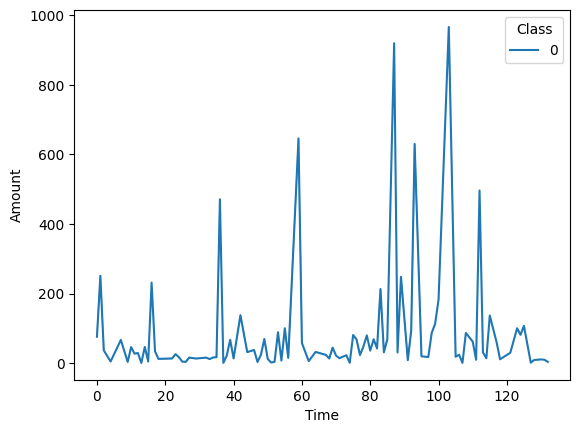

In [7]:
sns.lineplot(data=df[:200], x='Time', y='Amount', hue='Class', ci=0)
plt.show()

#### Exploring Fraud & Not Fraud

Class
0    284315
1       492
Name: count, dtype: int64


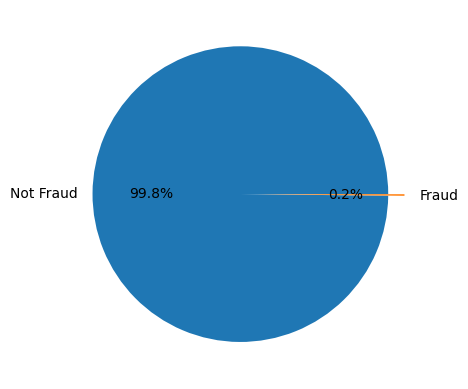

In [8]:
print(df['Class'].value_counts())
plt.pie(df['Class'].value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', explode=(.1, .01))
plt.show()

**The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.**

# Feature Engineering

#### Scaling Data using Standardisation on [Amount, Time] 

In [9]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df['Amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))

#### Building ML model [Logistic Regression]

In [10]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [11]:
X = df.drop('Class', axis=1)
y = df['Class']
print('The Shape of dataset X =',X.shape, 'y =',y.shape)

The Shape of dataset X = (284807, 30) y = (284807,)


#### Splitting the data into 95% train set and 5% test set

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

#### Build Base Model (Logistic Regression)

In [13]:
lr = LogisticRegression().fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14220
           1       0.69      0.43      0.53        21

    accuracy                           1.00     14241
   macro avg       0.85      0.71      0.76     14241
weighted avg       1.00      1.00      1.00     14241



#### Note
It seems a very good model with accuracy about 100% but f1-score of fraud class accuracy is about 53% because the imbalanced data problem

This is very bad model for detect fraud so let's treat with imbalanced data.

#### Split Data to train and test dataset before Handling Imbalanced data 
**[To Evaluate Model On Unseen Data]**

In [14]:
X1, x_test_final, y1, y_test_final = train_test_split(X, y, test_size=0.01, random_state=45)
print('Shape of test sample', x_test_final.shape)
y_test_final.value_counts()

Shape of test sample (2849, 30)


Class
0    2845
1       4
Name: count, dtype: int64

### Handling Imbalanced data

#### SMOTE

In [15]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(X, y)
df_res = pd.concat([x_res, y_res])
y_res.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.05, random_state=42, stratify=y_res)

lr = LogisticRegression().fit(x_train, y_train)

print('The Shape of test samples')
print(x_test.shape, y_test.shape)

The Shape of test samples
(28432, 30) (28432,)


In [17]:
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14216
           1       0.97      0.92      0.95     14216

    accuracy                           0.95     28432
   macro avg       0.95      0.95      0.95     28432
weighted avg       0.95      0.95      0.95     28432



#### Random Oversampling

In [18]:
ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(X, y)
df_res = pd.concat([x_res, y_res])
y_res.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.05, random_state=42, stratify=y_res)

lr = LogisticRegression().fit(x_train, y_train)
y_pred = lr.predict(x_test)

print('The Shape of test samples',x_test.shape, y_test.shape)
print(classification_report(y_test, y_pred))

The Shape of test samples (28432, 30) (28432,)
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     14216
           1       0.98      0.92      0.95     14216

    accuracy                           0.95     28432
   macro avg       0.95      0.95      0.95     28432
weighted avg       0.95      0.95      0.95     28432



Getting better with this technique

**We will use this method..**

### Building Neural Networks with TensorFlow

In [20]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [21]:
NN = Sequential([
    Dense(32, input_shape=(30, ), activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 1554 (6.07 KB)
Trainable params: 1554 (6.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
NN.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
NN.fit(x_train, y_train, validation_split=0.05, batch_size=128, epochs=50, shuffle=True)

Epoch 1/50
4010/4010 [==============================] - 7s 1ms/step - loss: 0.0487 - accuracy: 0.9833 - val_loss: 0.0125 - val_accuracy: 0.9974
Epoch 2/50
4010/4010 [==============================] - 5s 1ms/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 0.0064 - val_accuracy: 0.9986
Epoch 3/50
4010/4010 [==============================] - 5s 1ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.0049 - val_accuracy: 0.9990
Epoch 4/50
4010/4010 [==============================] - 5s 1ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 5/50
4010/4010 [==============================] - 5s 1ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9993
Epoch 6/50
4010/4010 [==============================] - 5s 1ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 7/50
4010/4010 [==============================] - 5s 1ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy:

In [24]:
NN_pred = np.argmax(NN.predict(x_test), axis=1)
print(classification_report(y_test, NN_pred))

889/889 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14216
           1       1.00      1.00      1.00     14216

    accuracy                           1.00     28432
   macro avg       1.00      1.00      1.00     28432
weighted avg       1.00      1.00      1.00     28432



**Evaluate Model On Unseen Data**

90/90 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2845
           1       1.00      1.00      1.00         4

    accuracy                           1.00      2849
   macro avg       1.00      1.00      1.00      2849
weighted avg       1.00      1.00      1.00      2849



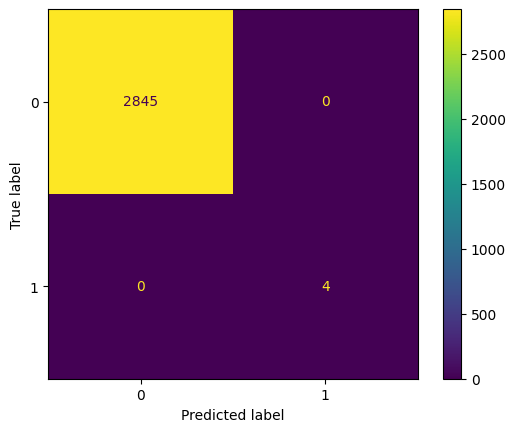

In [25]:
NN_pred = np.argmax(NN.predict(x_test_final), axis=1)
print(classification_report(y_test_final, NN_pred))

cm = confusion_matrix(y_test_final, NN_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### This is a very good model with accuracy about 100%